In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Create example data
# 1.1 Setup a single Bracewell

In [52]:
# combiner matrix for a single Bracewell array
combiner = np.array(((1, -1), (1, 1))) / np.sqrt(2)

# collector positions
baseline = 15  # in meter

# rotation angles over observation
rotation_angle = np.linspace(0., 2*np.pi, 1000)  # in rad

collector_positions_init = np.array(((-baseline/2, baseline/2), (0, 0)))

rotation_matrix = np.array(((np.cos(rotation_angle), -np.sin(rotation_angle)),
                            (np.sin(rotation_angle), np.cos(rotation_angle))))

collector_position = np.dot(np.swapaxes(rotation_matrix, -1, 0), collector_positions_init)

# observing wavelength
wl_bin = 10e-6  # in meter

# collector area
scaled_area = 1  # in meter^2

## 1.2 Compute planet signal

In [93]:
# source position
separation_arcsec = 0.1  # in arcsec
separation_rad = separation_arcsec / 3600 / 180 * np.pi  # in rad

# rotation angles over observation
rotation_angle_planet = 0. # in rad

# source position angle vectors in radians
source_position = np.array((separation_rad * np.cos(rotation_angle_planet), 
                            separation_rad * np.sin(rotation_angle_planet)))

# Calculate the phase term
phase_term = 1j * 2 * np.pi / wl_bin

# Compute the dot products for all t in one go using np.tensordot
dot_product_x = np.tensordot(collector_position[:, 0, :], source_position, 
                             axes=([1], [0]))
dot_product_y = np.tensordot(collector_position[:, 1, :], source_position, 
                             axes=([1], [0]))

# Calculate the phasors
phasor_x = scaled_area * np.exp(phase_term * dot_product_x)
phasor_y = scaled_area * np.exp(phase_term * dot_product_y)

# Combine the results
input_phasor = np.array([phasor_x, phasor_y])

planet_signal = np.abs(np.array([np.dot(combiner, input_phasor[:, t]) for t in range(input_phasor.shape[1])]))**2

star_signal = np.random.normal(np.mean(planet_signal)*10, np.sqrt(np.mean(planet_signal)*10), planet_signal.shape)

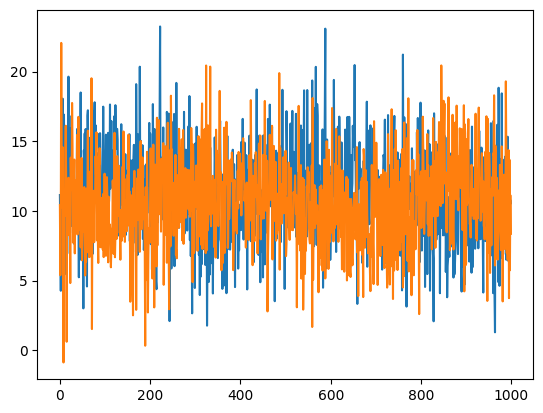

In [94]:
plt.plot(planet_signal + star_signal)